# Exploratory Data Analysis for Machine Learning

## Introduction

I will be using the NOAA data set for this Course Project. This is a well-known data set containing climate and earth sciences datasets, NOAA-NCEI is one of the world’s largest provider of weather and climate data. Land-based, marine, model, radar, weather balloon, satellite, and paleoclimatic are just a few of the types of datasets available.

The data we will use is in a file called `data.csv` found in the [data](data/) directory. "El Niño" (ENOS) and "La Niña" is a phenomenon in the equatorial Pacific Ocean characterized by a five consecutive 3-month running mean of sea surface temperature (SST) anomalies in the Niño 3.4 region that is above (below) the threshold of +0.5°C (-0.5°C). This standard of measure is known as the Oceanic Niño Index (ONI).

This data comes from https://psl.noaa.gov/gcos_wgsp/Timeseries/Data/nino34.long.anom.data

In [1]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']

import os
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
sns.set()

Populating the interactive namespace from numpy and matplotlib


## 01. Brief description of the data set and a summary of its attributes

There are 1800 data of monthly temperature fluctuations from 1870 to 2019, the data series contains 150 rows corresponding to the years and 12 columns corresponding to the months of the year. 

Load the data from the file using the techniques we learned from this course. Some general info regarding the dataset is showing next:

#### Head of the dataset

In [2]:
filepath = "data/data.csv"
data = pd.read_csv(filepath)
(data.head())

,Year,January,February,March,April,May,June,July,August,September,October,November,December
0,1870.0,-1.00,-1.20,-0.83,-0.81,-1.27,-1.08,-1.04,-0.88,-0.53,-0.92,-0.79,-0.79
1,1871.0,-0.25,-0.58,-0.43,-0.50,-0.70,-0.53,-0.60,-0.33,-0.24,-0.33,-0.31,-0.58
2,1872.0,-0.72,-0.62,-0.50,-0.77,-0.62,-0.52,-0.32,-0.85,-1.02,-0.94,-0.79,-0.88
3,1873.0,-0.78,-1.01,-1.31,-0.67,-0.53,-0.48,-0.58,-0.39,-0.34,-0.78,-0.77,-0.70
4,1874.0,-0.93,-1.06,-1.40,-0.94,-0.86,-0.72,-1.00,-1.05,-1.13,-1.25,-1.33,-1.14


#### Number of rows and type of data

In [3]:
print(data.shape[0])
print(len(data))
print(data.dtypes)

153
153
Year         float64
January      float64
February     float64
March        float64
April        float64
May          float64
June         float64
July         float64
August       float64
September    float64
October      float64
November     float64
December     float64
dtype: object


## 02. Initial plan for data exploration

As an initial statistical approach, we would determine the following:
* The mean, median, and quantiles and ranges (max-min) for each monthly measurement.

In [4]:
stats_df = data.describe()
stats_df = data.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['mean','25%','50%','75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

,Year,January,February,March,April,May,June,July,August,September,October,November,December
mean,1944.50,-0.055333,-0.048467,-0.115733,-0.107467,-0.1582,-0.107933,-0.135533,-0.106467,-0.120933,-0.096467,-0.099267,-0.0326
25%,1907.25,-0.702500,-0.637500,-0.627500,-0.550000,-0.5300,-0.520000,-0.577500,-0.610000,-0.585000,-0.742500,-0.787500,-0.7500
median,1944.50,-0.250000,-0.130000,-0.105000,-0.155000,-0.1700,-0.125000,-0.125000,-0.155000,-0.165000,-0.185000,-0.260000,-0.1350
75%,1981.75,0.557500,0.482500,0.290000,0.277500,0.2175,0.252500,0.227500,0.232500,0.392500,0.415000,0.575000,0.6800
range,149.00,5.050000,4.540000,3.130000,2.710000,2.7300,2.740000,3.140000,3.420000,3.660000,4.380000,4.750000,4.7400


## 03. Actions taken for data cleaning

I will make a scatter plot of our dataset using Matplotlib. This will be an initial step for the cleaning of the data since we will notice the outliers graphically.

#### 3.1. Scatterplot

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

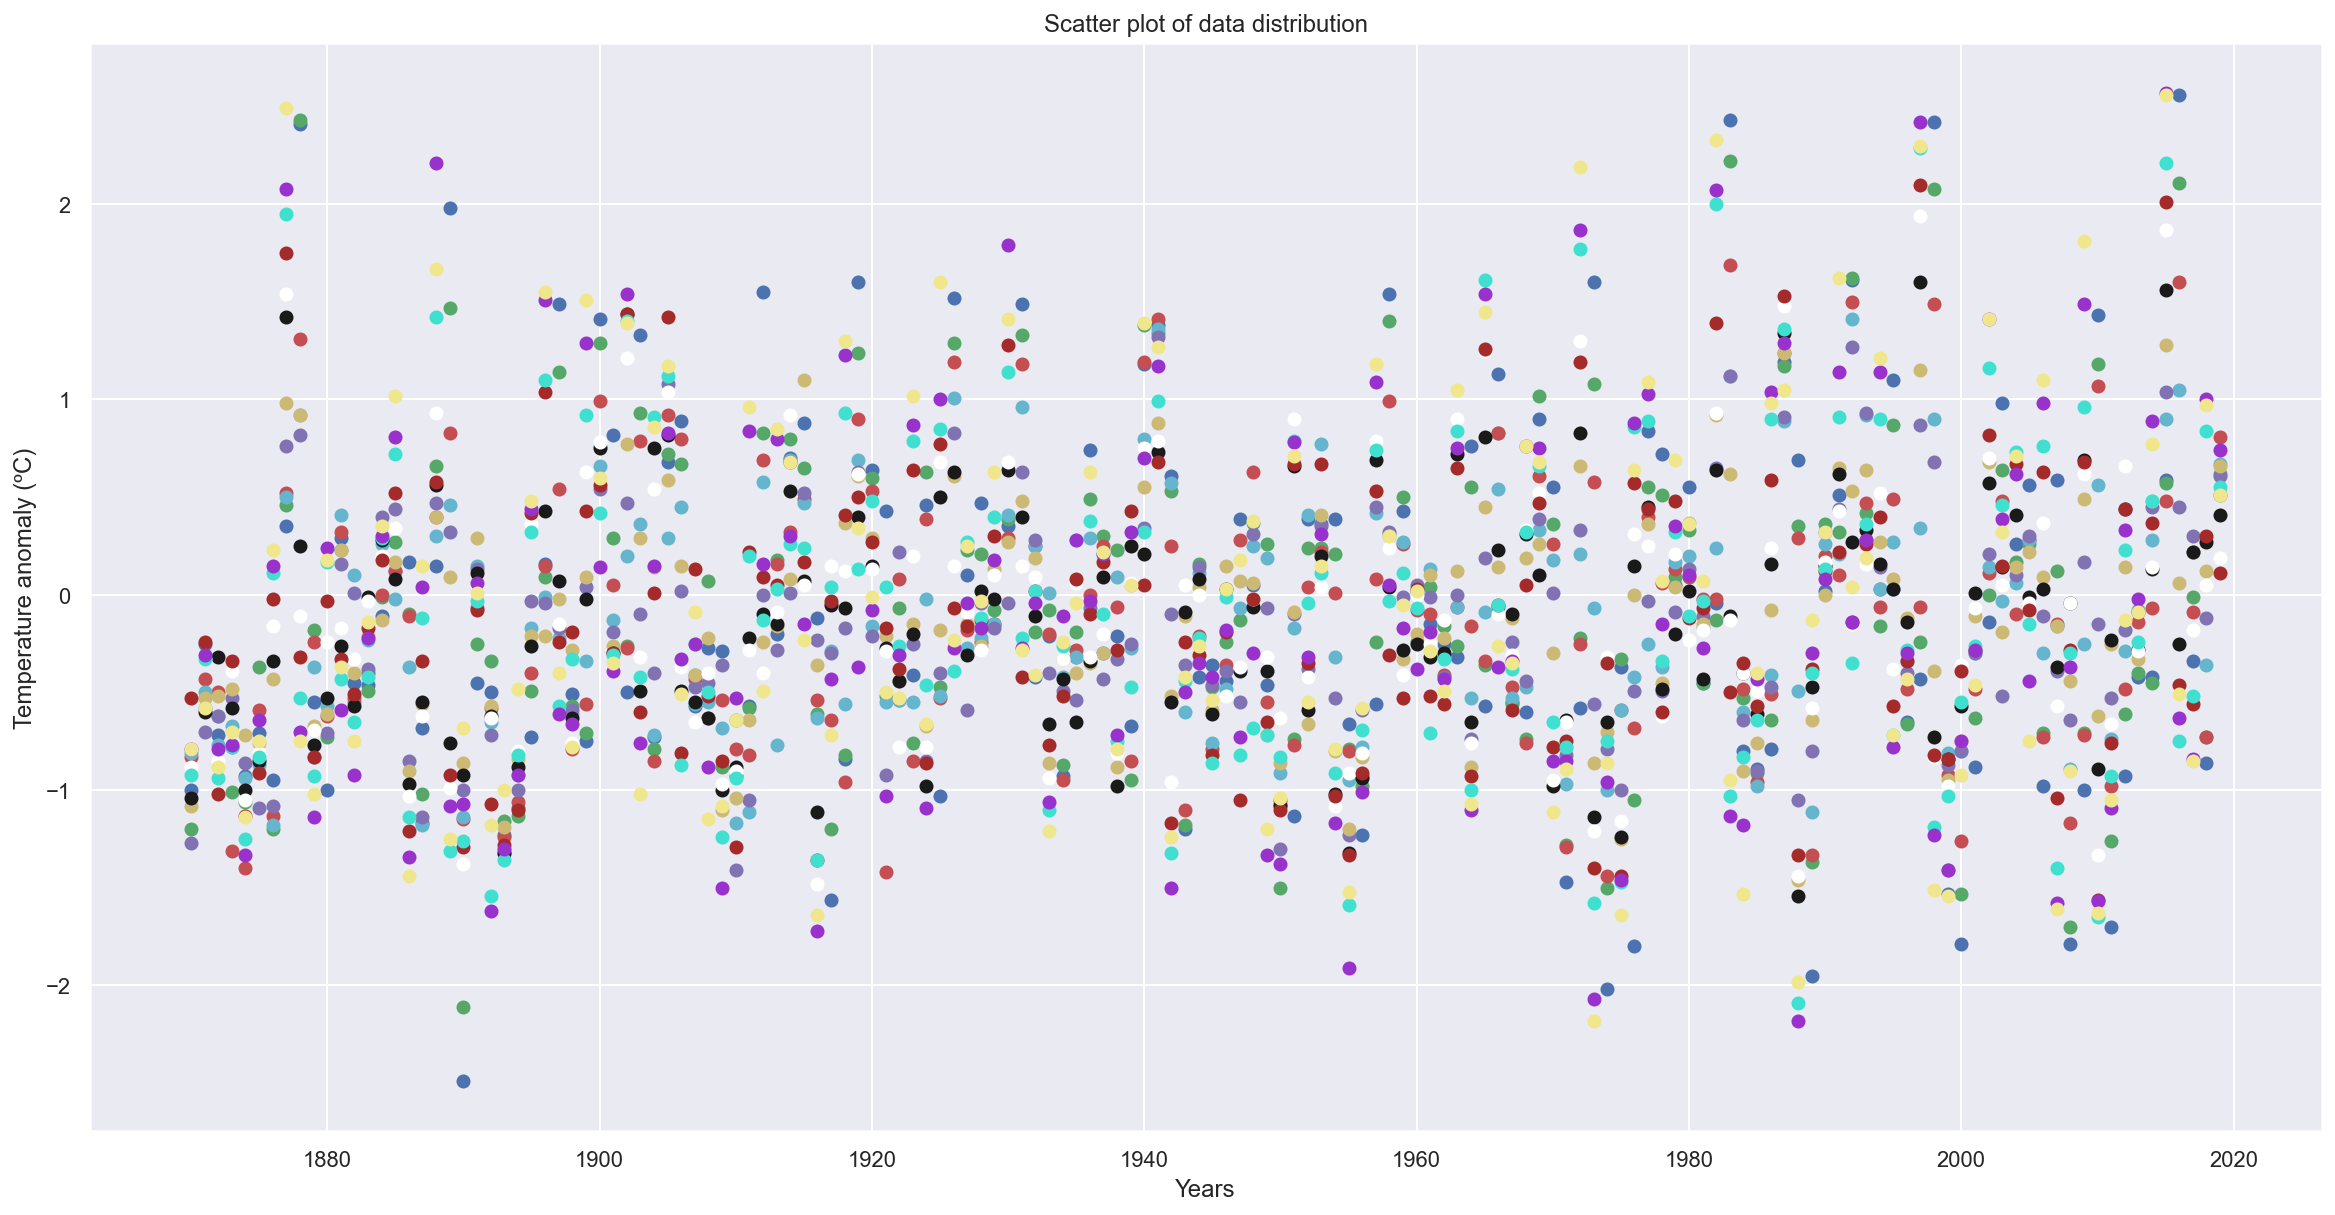

In [6]:
# A simple scatter plot with Matplotlib
# Size of the figure (in inches)
fig, ax = plt.subplots(figsize=(20, 10))
ax = plt.axes()
ax.scatter(data.Year, data.January, color='b')
ax.scatter(data.Year, data.February, color='g')
ax.scatter(data.Year, data.March, color='r')
ax.scatter(data.Year, data.April, color='c')
ax.scatter(data.Year, data.May, color='m')
ax.scatter(data.Year, data.June, color='y')
ax.scatter(data.Year, data.July, color='k')
ax.scatter(data.Year, data.August, color='w')
ax.scatter(data.Year, data.September, color='brown')
ax.scatter(data.Year, data.October, color='turquoise')
ax.scatter(data.Year, data.November, color='darkorchid')
ax.scatter(data.Year, data.December, color='khaki')

# Label the axes
ax.set(xlabel='Years',
       ylabel='Temperature anomaly (ºC)',
       title='Scatter plot of data distribution');

It is possible to see in the previous figure how there are outliers data that do not correspond to the trend of all data, so they can be catalogued as anomalies by identifying them visually.

#### 3.2. Histograms
Make a histogram of any one of the twelve features, by year, creating a single plot with histograms for each feature overlayed.

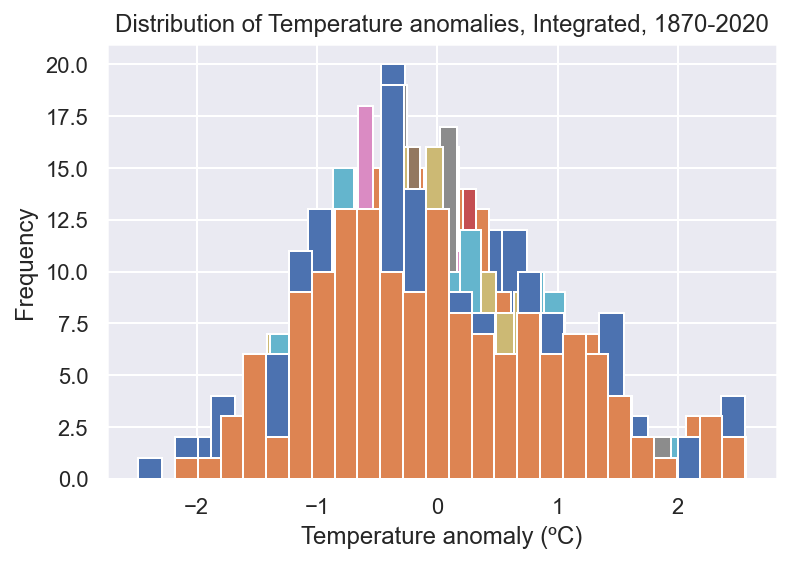

In [7]:
# Histograms using Pandas plotting functionality
ax = data.January.plot.hist(bins=25)
ax2 = data.February.plot.hist(bins=25)
ax3 = data.March.plot.hist(bins=25)
ax4 = data.April.plot.hist(bins=25)
ax5 = data.May.plot.hist(bins=25)
ax6 = data.June.plot.hist(bins=25)
ax7 = data.July.plot.hist(bins=25)
ax8 = data.August.plot.hist(bins=25)
ax9 = data.September.plot.hist(bins=25)
ax10 = data.October.plot.hist(bins=25)
ax11 = data.November.plot.hist(bins=25)
ax12 = data.December.plot.hist(bins=25)
ax.set(xlabel='Temperature anomaly (ºC)', 
       ylabel='Frequency',
       title='Distribution of Temperature anomalies, Integrated, 1870-2020');

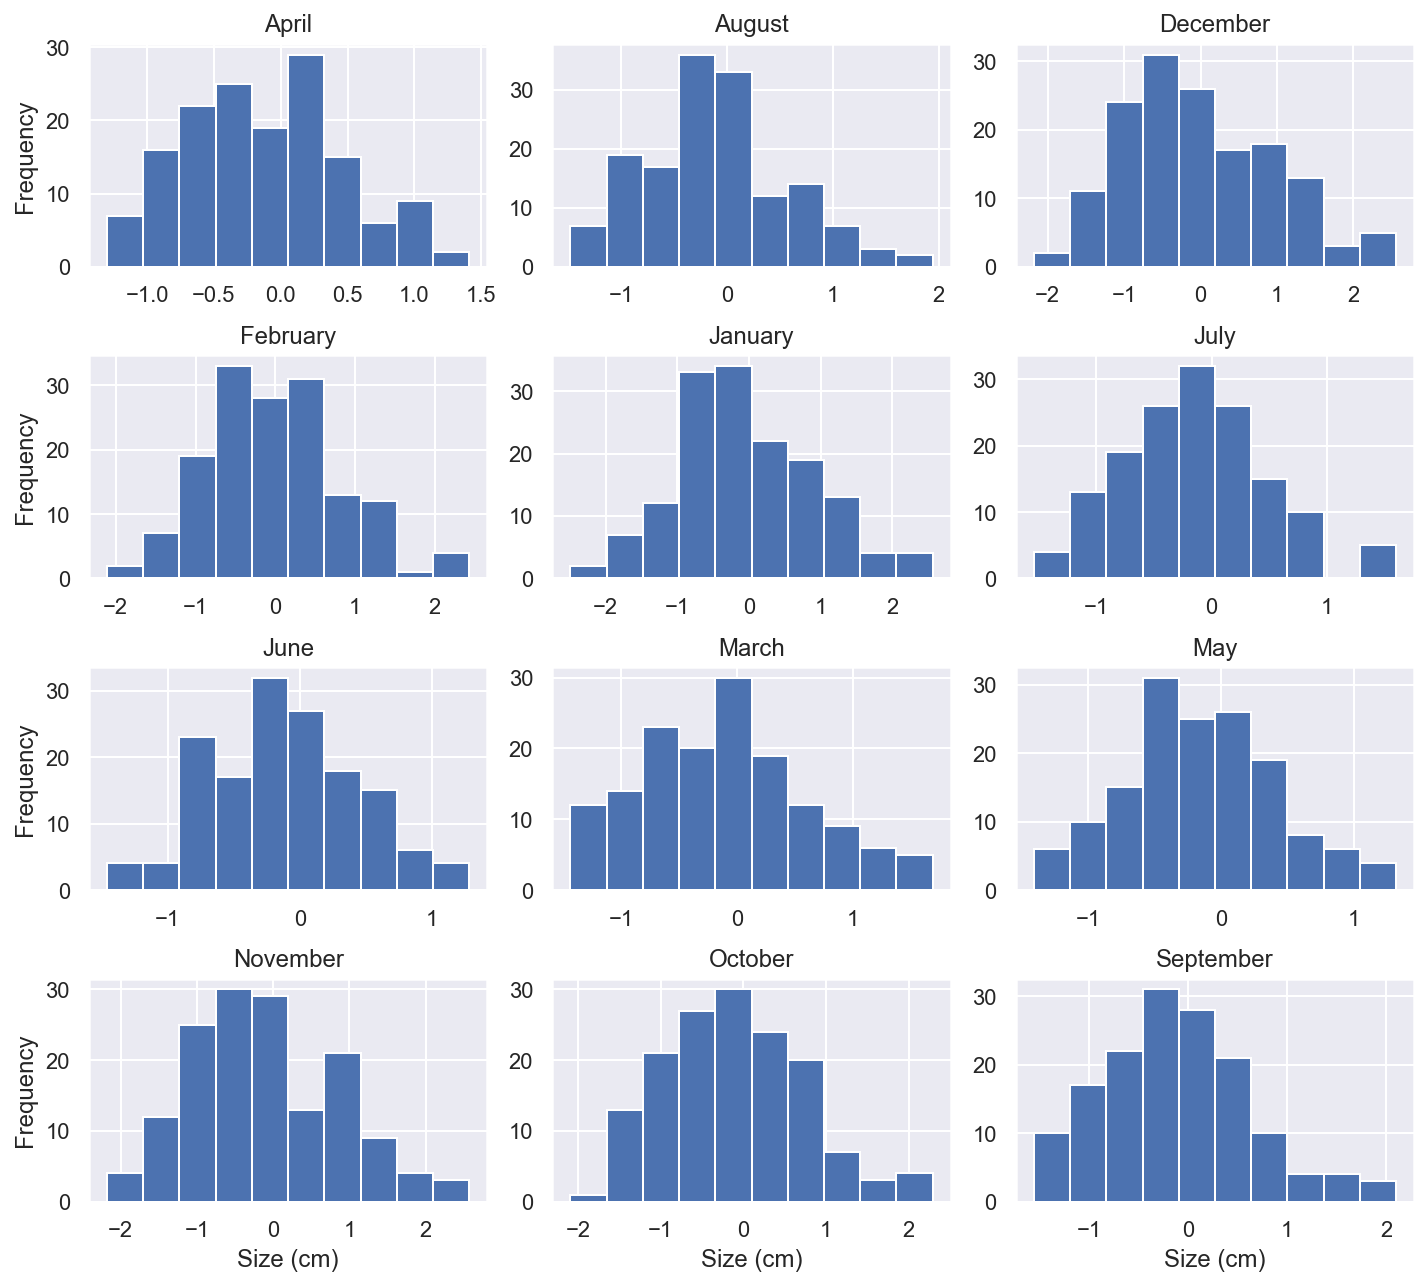

In [8]:
# To use all the columns, excepting "Year"
data = data.loc[:, data.columns != 'Year']
# To create four separate plots, I used Pandas `.hist` method
axList = data.hist(figsize=(10,9))

# Add some x- and y- labels to first column and last row
for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Size (cm)')
        
    if ax.is_first_col():
        ax.set_ylabel('Frequency')
        
# In order to prevent plot titles from overlappig, I simply call
plt.tight_layout()
plt.show()

## 04. Actions taken for feature engineering

I will set out to improve on a baseline set of features via feature engineering: deriving new features from our existing data. Feature engineering often makes the difference between a weak model and a strong one.

I will use visual exploration, domain understanding, and intuition to construct new features to improve the forecasting capabilities of some new foreseen model.

**Chapter contents**

> 1. One-hot Encoding variables
> 2. Log transformation for skewed variables
> 3. Pair plot for features


#### 4.1. One-hot Encoding variables

I'm going to first do some basic data cleaning on this data: 

* Converting categorical variables to dummies
* Making skew variables symmetric

In [9]:
# Get a Pd.Series consisting of all the string categoricals
one_hot_encode_cols = data.dtypes[data.dtypes == np.object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

data[one_hot_encode_cols].head().T
# Do the one hot encoding
data = pd.get_dummies(data, columns=one_hot_encode_cols, drop_first=True)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
January,150.0,-0.055333,0.968911,-2.49,-0.7025,-0.250,0.5575,2.56
February,150.0,-0.048467,0.842643,-2.11,-0.6375,-0.130,0.4825,2.43
March,150.0,-0.115733,0.712758,-1.44,-0.6275,-0.105,0.2900,1.69
April,150.0,-0.107467,0.583733,-1.30,-0.5500,-0.155,0.2775,1.41
May,150.0,-0.158200,0.575536,-1.41,-0.5300,-0.170,0.2175,1.32
June,150.0,-0.107933,0.559892,-1.46,-0.5200,-0.125,0.2525,1.28
July,150.0,-0.135533,0.609813,-1.54,-0.5775,-0.125,0.2275,1.60
August,150.0,-0.106467,0.676454,-1.48,-0.6100,-0.155,0.2325,1.94
September,150.0,-0.120933,0.732286,-1.56,-0.5850,-0.165,0.3925,2.10
October,150.0,-0.096467,0.854442,-2.09,-0.7425,-0.185,0.4150,2.29


#### 4.2. Log transforming skew variables


In [10]:
# Create a list of float colums to check for skewing
mask = data.dtypes == np.float
float_cols = data.columns[mask]

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = data[float_cols].skew()

In [11]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew


Skewed columns are columns in which the data is not evenly distributed among the rows. According to this, there is no skewed data in this dataset.

#### 4.3. Pair plot of features

Let's generate visuals to better understand the target and feature-target relationships: pairplot is great for this!

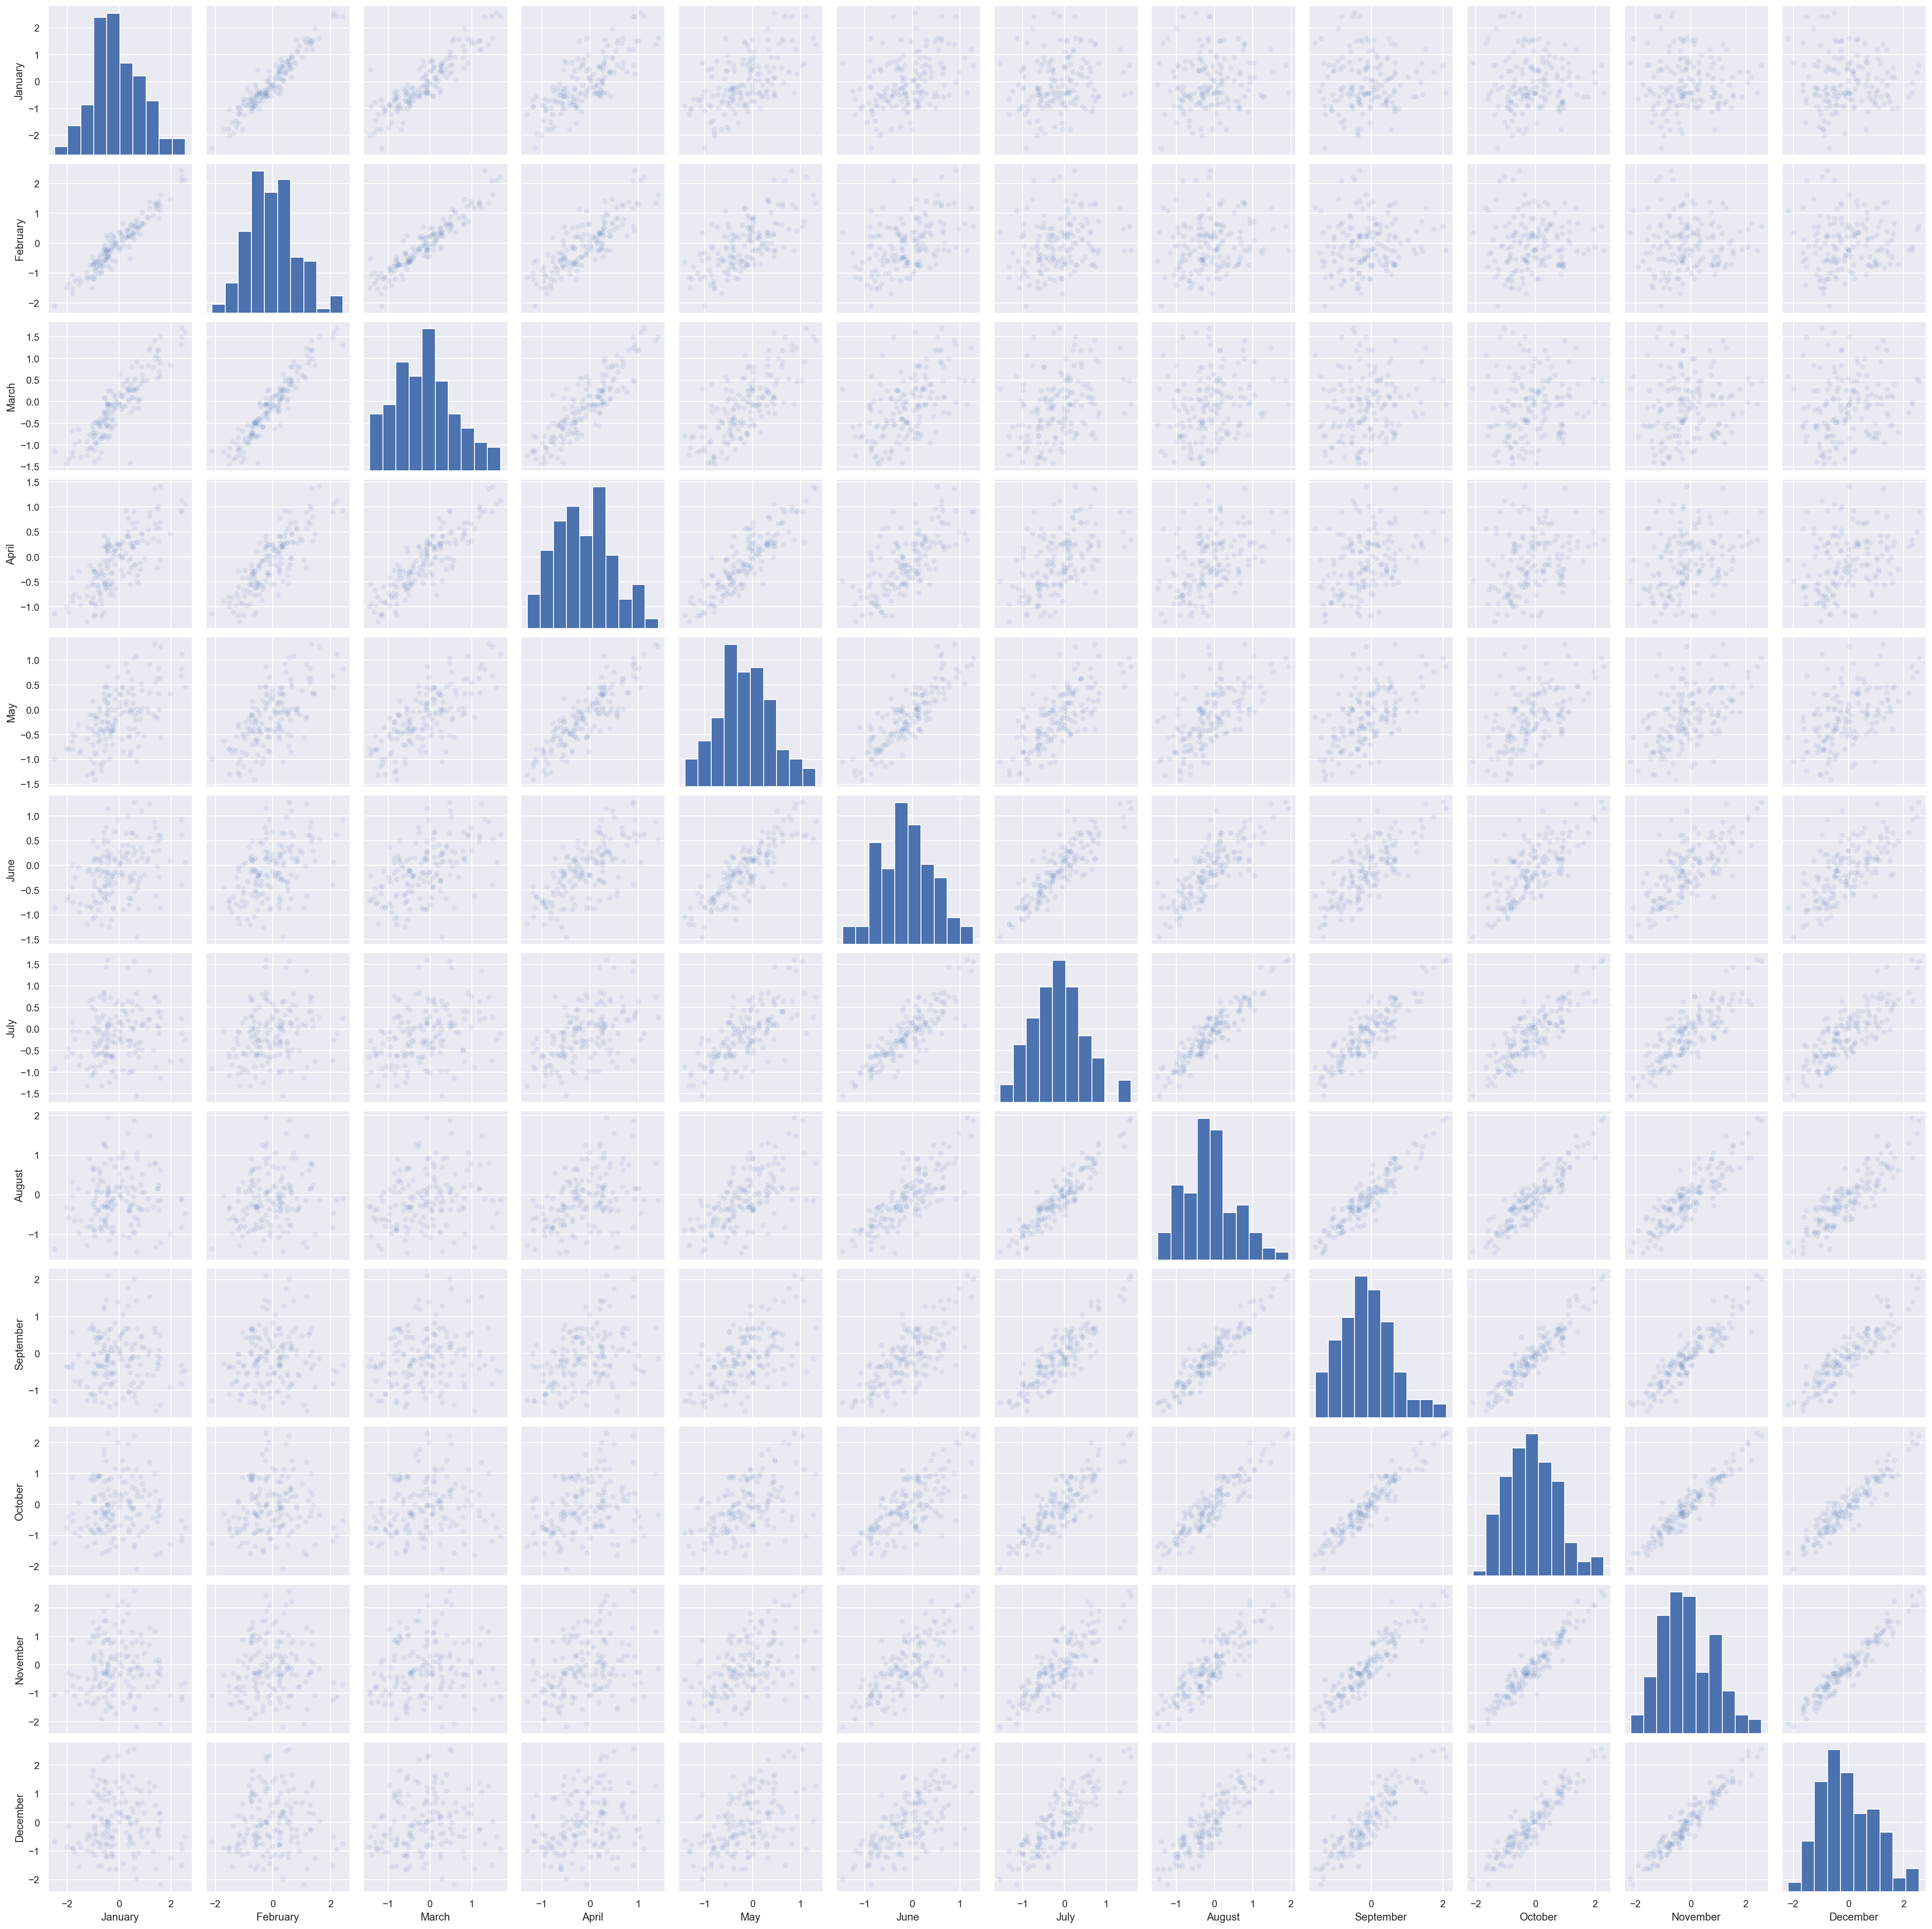

In [12]:
sns.pairplot(data, plot_kws=dict(alpha=.1, edgecolor='none'))

Because the data series does not contain different temperature categories, but presents the average ranges of the temperature anomalies, it is not possible to execute the following analyses, since they depend on the existence of different categories in the data series:

> A. Basic feature engineering: adding polynomial and interaction terms
> B. Feature engineering: categories and features derived from category aggregates 


## 05. Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner

**Data Exploration Discussion**: 

1. What do these plots tell us about the distribution of the target?  

The distribution of each data set follows an almost normal distribution, with some exceptions as is to be expected in a data set expressing an anomaly, in this case, of ocean temperatures.

2. What do these plots tell us about the relationship between the features and the target? Do you think that linear regression is well-suited to this problem? Do any feature transformations come to mind?

By looking at the scatterplots of the data series, it is possible to interpret that it is not possible to perform linear regressions, either by the method of least squares or by any other way that allows the interpretation of the behaviour of the data in the form of linear, polynomial or other equations. The dispersion of the data is such that other, more complex statistical analyses would be required.

3. What do these plots tell us about the relationship between various pairs of features? Do you think there may be any problems here? 

Each data set is not different in nature from the others, as they all reflect the behaviours of a natural variable. Despite the possible sources of error in the measurement of these data, it is not possible to say that these data are influenced by each other. The environmental conditions vary according to the time of year, but this is an external variable.

## 06. Hypothesis Testing

I will formulate at least three hypotheses about this data. Also, I conduct a formal significance test for one of the hypotheses and discuss the results.

#### 4.1. Null hypotheses: Formulating at least 3 hypothesis about this data

a. First claim: On average, the temperature's anomalies are higher than -0,10. The decision is based on a check of a random sample of this data.
b. Second claim: The ENSO phenomenon will have an impact on sea level rise if the anomalies mostly oscillate between -0.5 and 1.5 ºC; has this been true in the time interval between 1870 and 2020?
c. Third claim: It could be said that there has not been a period of twelve months in which, in a row, these temperature anomalies have fallen from 0.5 ºC?

#### 4.2. Conducting a formal significance test for one of the hypotheses and discuss the results

I have selected for the formal significance test the hypothesis a: On average, the temperature's anomalies are higher than -0,1. The decision is based on a check of a random sample of this data.

Population: X = 'Water temperature anomalies on sector 3.4 of the Pacific Ocean'

Ho: μ = -0,1  null hypothesis

Ha: μ > -0,1  alternative hypothesis

Approach: I would use the one sample t-test : The One Sample t Test determines whether the sample mean is statistically different from a known or hypothesised population mean. The One Sample t Test is a parametric test.

In [13]:
mean = data.mean()
sd = data.std()
(mean, sd)

(January     -0.055333
 February    -0.048467
 March       -0.115733
 April       -0.107467
 May         -0.158200
 June        -0.107933
 July        -0.135533
 August      -0.106467
 September   -0.120933
 October     -0.096467
 November    -0.099267
 December    -0.032600
 dtype: float64,
 January      0.968911
 February     0.842643
 March        0.712758
 April        0.583733
 May          0.575536
 June         0.559892
 July         0.609813
 August       0.676454
 September    0.732286
 October      0.854442
 November     0.971672
 December     0.992966
 dtype: float64)

In [14]:
from scipy.stats import ttest_1samp
import numpy as np
tset, pval = ttest_1samp(mean, -0.10)
print('p-values',pval)

p-values 0.9041224321648226


In [15]:
if pval < 0.05:    # alpha value is 0.05 or 5%
   print("I am rejecting null hypothesis")
else:
  print("I am accepting null hypothesis")

I am accepting null hypothesis


#### Conclusion of the hypothesis test

Since the p-value (0.9041) is way higher than the standard confidence level 0.05, we can accept the Null hypothesis that, on average, the temperature's anomalies are higher than -0,1. There is weak (almost non-existance) evidence in support for the alternatine hypothesis that, on average, the temperature's anomalies are not higher than -0,1. 